In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
df = pd.read_csv('titanic.csv')

In [51]:
# Drop irrelevant columns or columns with too many missing values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [52]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [53]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [54]:
# Split data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [55]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train=pd.DataFrame(X_train,columns=df.iloc[:,0:-1].columns)
X_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q
0,-1.614136,1.253641,-0.470722,-0.479342,-0.078684,0.724310,-0.303355,0.592489
1,-0.400551,-0.477284,-0.470722,-0.479342,-0.377145,0.724310,-0.303355,0.592489
2,0.813034,0.215086,-0.470722,-0.479342,-0.474867,0.724310,-0.303355,0.592489
3,0.813034,-0.246494,0.379923,-0.479342,-0.476230,0.724310,-0.303355,0.592489
4,0.813034,-1.785093,2.931860,2.048742,-0.025249,-1.380624,-0.303355,0.592489
...,...,...,...,...,...,...,...,...
707,0.813034,-0.631144,-0.470722,-0.479342,-0.480162,-1.380624,-0.303355,0.592489
708,-1.614136,-0.092634,-0.470722,-0.479342,-0.030545,0.724310,-0.303355,0.592489
709,0.813034,0.907456,1.230569,-0.479342,-0.355804,0.724310,-0.303355,0.592489
710,-1.614136,-1.169653,0.379923,2.048742,1.683201,-1.380624,-0.303355,0.592489


In [58]:
X_test=pd.DataFrame(X_test,columns=df.iloc[:,0:-1].columns)
X_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q
0,0.813034,-0.092634,0.379923,0.784700,-0.333901,0.724310,-0.303355,-1.687794
1,-0.400551,0.138156,-0.470722,-0.479342,-0.425284,0.724310,-0.303355,0.592489
2,0.813034,-0.708074,-0.470722,-0.479342,-0.474867,0.724310,-0.303355,0.592489
3,-0.400551,-1.785093,-0.470722,0.784700,0.007966,-1.380624,-0.303355,0.592489
4,0.813034,-1.169653,0.379923,-0.479342,-0.411002,-1.380624,-0.303355,-1.687794
...,...,...,...,...,...,...,...,...
174,0.813034,-0.938863,-0.470722,-0.479342,-0.490271,0.724310,-0.303355,0.592489
175,0.813034,-0.092634,-0.470722,-0.479342,-0.488346,0.724310,-0.303355,-1.687794
176,0.813034,0.676666,0.379923,5.840867,-0.023083,-1.380624,-0.303355,0.592489
177,-0.400551,-0.938863,-0.470722,-0.479342,-0.425284,-1.380624,-0.303355,0.592489


## Logistic Regression

In [59]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier()
}

In [60]:

# Define parameters for GridSearchCV or RandomizedSearchCV for each model
params = {
    "Logistic Regression": {'model__C': [0.1, 1, 10]},
    "K-Nearest Neighbors": {'model__n_neighbors': [3, 5, 7]},
    "Support Vector Machine": {'model__C': [0.1, 1, 10], 'model__gamma': [0.1, 1, 10], 'model__kernel': ['rbf']},
    "Decision Tree": {'model__max_depth': [3, 5, 7, None]},
    "Random Forest": {'model__n_estimators': [50, 100, 200]},
    "Gradient Boosting": {'model__learning_rate': [0.05, 0.1, 0.2], 'model__n_estimators': [50, 100, 200]},
    "AdaBoost": {'model__n_estimators': [50, 100, 200]},
    "Gaussian Naive Bayes": {},
    "Extra Trees": {'model__n_estimators': [50, 100, 200]},
    "Bagging Classifier": {'model__n_estimators': [50, 100, 200]}
}

In [61]:
# Initialize lists to store model names and their corresponding test accuracies
model_names = []
test_accuracies = []

In [62]:
# Loop through models, fit them, and append the results to lists
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    search = GridSearchCV(pipeline, params[model_name], cv=5, n_jobs=-1)  # You can also use RandomizedSearchCV
    search.fit(X_train, y_train)
    model_names.append(model_name)
    test_accuracies.append(search.score(X_test, y_test))

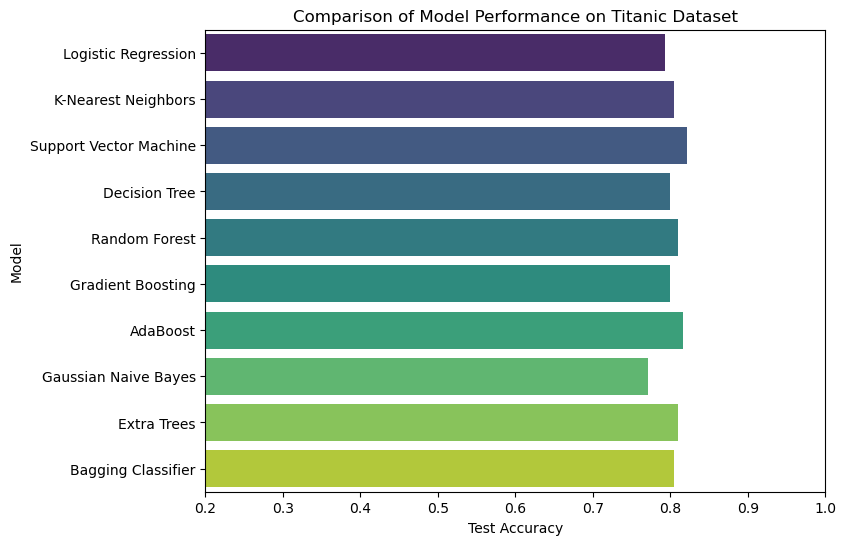

In [78]:
# Creating a DataFrame for plotting
df_plot = pd.DataFrame({'Model': model_names, 'Test Accuracy': test_accuracies})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=df_plot, x='Test Accuracy', y='Model', palette='viridis')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Performance on Titanic Dataset')
plt.xlim(0.2, 1.0)
plt.show()